# Twitter Sentiment Analysis

# <center> <img src="https://miro.medium.com/max/700/1*0OVev9mGkNJblfkOxkknAQ.png"> </center>

Devise a sentimental analyzer for overcoming the challenges to identify the twitter tweets text sentiments (positive, negative) by implementing neural network using tensorflow.

After training the model, we apply the evaluation measures to check that how the model is getting predictions. We will use the following evaluation measures to evaluate the performance of the models:
- Accuracy
- Confusion matrix with plot
- ROC Curve

Technical Approach:
We are using python language in the implementations and Jupter Notebook that support the machine learning and data science projects. We will build tensorflow based model. We will use Sentiment 140 dataset and split that data into 80% for training, 10% for validation, and 10% for the testing purposes. After training on the model, we will evaluate the model to evaluate the performance of trained model

Dataset:"https://www.kaggle.com/kazanova/sentiment140"

## Importing Python Libraries

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [1]:
# !pip install nltk

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import re
import string
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Loading the Data

In [4]:
# pip install kaggle

In [5]:
# mkdir ~/.kaggle

In [6]:
# cp kaggle.json ~/.kaggle/

In [7]:
# !chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download kazanova/sentiment140

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
# import zipfile
# zip_file = zipfile.ZipFile("/content/sentiment140.zip")
# zip_file.extractall("/tmp/")

In [10]:
dataset = pd.read_csv("./training.1600000.processed.noemoticon.csv",encoding = "ISO-8859-1")
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
dataset.columns = ["label", "time", "date", "query", "username", "text"]

## EDA
</div>

#### Five top records of data

In [12]:
dataset.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#### Five last records of data

In [13]:
dataset.tail()

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


#### Coloumns/features in data

In [14]:
dataset.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

#### Length of data

In [15]:
print('lenght of data is', len(dataset))

lenght of data is 1599999


#### Shape of data

In [16]:
dataset.shape

(1599999, 6)

#### Data information

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [18]:
dataset["label"].value_counts()

label
4    800000
0    799999
Name: count, dtype: int64

#### Data types of all coloumns

In [19]:
dataset.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

#### Checking Null values

In [20]:
np.sum(dataset.isnull().any(axis=1))

0

#### Rows and columns in the dataset

In [21]:
print('Count of columns in the data is:  ', len(dataset.columns))

Count of columns in the data is:   6


In [22]:
print('Count of rows in the data is:  ', len(dataset))

Count of rows in the data is:   1599999


## Data Preparation
- Selection of interested columns.
- Assigned 1 to class 4.
- Took one-fourth of the data for easier processing.
- Combined positive and negative tweets.
- Convert text to lowercase for further processing on tweet text.
- Clean and remove stop words (e.g., "of", "a", "in") as they do not support sentiment labels.
- Clean and remove punctuations as they add noise and are not meaningful.
- Clean and remove repeating characters in words.
- Clean and remove emails.
- Clean and remove URLs.
- Clean and remove numbers from the data.
- Apply tokenization (separating sentences into words).
- Apply stemming and lemmatization:
- Stemming: Reduce words to their root form.
- Lemmatization: Convert words to their base form.
- Apply stemming on the tweet text.
- Apply lemmatization on the tweet text.
- Separate input features and labels.
- Extract features from input features.
- Separate 80% of the data for training, 10% for validation, and 10% for testing.

#### Selecting the text and label column

In [23]:
data=dataset[['text','label']]

#### Assigning 1 to Positive sentment 4

In [24]:
data['label'][data['label']==4]=1

#### Separating positive and negative tweets

In [25]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

#### does not use all data so we can run it on our machine easily

In [26]:
data_pos = data_pos.iloc[:int(200000)]
data_neg = data_neg.iloc[:int(200000)]

#### Combining positive and negative tweets

In [27]:
data = pd.concat([data_pos, data_neg])

#### Making statement text in lower case

In [28]:
data.shape

(400000, 2)

In [29]:
data['text']=data['text'].str.lower()

In [30]:
data['text'].tail()

199995                                       work... again 
199996    @damienfranco its so common for it to crash no...
199997            my baby boy is wearing big boy underwear 
199998               fml! i forgot my phone charger @home! 
199999    can't believe i have to wait another 6 months ...
Name: text, dtype: object

#### Cleaning and removing Stop words of english

In [31]:
stopwords_list = stopwords.words('english')

In [32]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [33]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(cleaning_stopwords)
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

#### Cleaning and removing punctuations

In [34]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [35]:
data['text']= data['text'].apply(cleaning_punctuations)
data['text'].tail()

199995                                                 work
199996    damienfranco common crash find delete process ...
199997                   baby boy wearing big boy underwear
199998                        fml forgot phone charger home
199999    cant believe wait another 6 months phone contr...
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [36]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [37]:
data['text'] = data['text'].apply(cleaning_repeating_char)
data['text'].tail()

199995                                                 work
199996    damienfranco comon crash find delete proces ok...
199997                   baby boy wearing big boy underwear
199998                        fml forgot phone charger home
199999    cant believe wait another 6 months phone contr...
Name: text, dtype: object

#### Cleaning and removing email

In [38]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [39]:
data['text']= data['text'].apply(cleaning_email)
data['text'].tail()

199995                                                 work
199996    damienfranco comon crash find delete proces ok...
199997                   baby boy wearing big boy underwear
199998                        fml forgot phone charger home
199999    cant believe wait another 6 months phone contr...
Name: text, dtype: object

#### Cleaning and removing URL's

In [40]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [41]:
data['text'] = data['text'].apply(cleaning_URLs)
data['text'].tail()

199995                                                 work
199996    damienfranco comon crash find delete proces ok...
199997                   baby boy wearing big boy underwear
199998                        fml forgot phone charger home
199999    cant believe wait another 6 months phone contr...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [42]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [43]:
data['text'] = data['text'].apply(cleaning_numbers)
data['text'].tail()

199995                                                 work
199996    damienfranco comon crash find delete proces ok...
199997                   baby boy wearing big boy underwear
199998                        fml forgot phone charger home
199999    cant believe wait another  months phone contra...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [44]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [45]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

#### Applying Stemming

In [46]:
st = PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(stemming_on_text)

In [47]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

#### Applying Lemmatizer

In [48]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

data['text'] = data['text'].apply(lemmatizer_on_text)

In [49]:
data['text'].head()

799999              [love, healthuandpets, u, guy, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurt, much, eat, real, fo...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

### Labels:
labels are the targets like in this project senitments of the tweets are labels.

### Inputs:
Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs.

### Training Data
We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

### Validation Data
We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

### Testing Data
We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

####  Separating input feature and label

In [50]:
X=data.text
y=data.label

#### Preparing the input features for training
- We converting the text words into arrays form.
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [51]:
X[0]

['upset',
 'cant',
 'update',
 'facebok',
 'texting',
 'it',
 'might',
 'cry',
 'result',
 'schol',
 'today',
 'also',
 'blah']

In [52]:
max_len = 25
tok = Tokenizer()
tok.fit_on_texts(X)
print(len(tok.word_index))
sequences = tok.texts_to_sequences(X)

257166


In [53]:
help(Tokenizer())

Help on Tokenizer in module keras.preprocessing.text object:

class Tokenizer(builtins.object)
 |  Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |  
 |  Text tokenization utility class.
 |  
 |  Deprecated: `tf.keras.preprocessing.text.Tokenizer` does not operate on
 |  tensors and is not recommended for new code. Prefer
 |  `tf.keras.layers.TextVectorization` which provides equivalent functionality
 |  through a layer which accepts `tf.Tensor` input. See the
 |  [text loading tutorial](https://www.tensorflow.org/tutorials/load_data/text)
 |  for an overview of the layer and text handling in tensorflow.
 |  
 |  This class allows to vectorize a text corpus, by turning each
 |  text into either a sequence of integers (each integer being the index
 |  of a token in a dictionary) or into a vector where the coefficient
 |  for each token could be binary, based on word count, based

In [54]:
len(sequences[0])

6

In [55]:
len(sequences)

400000

400000


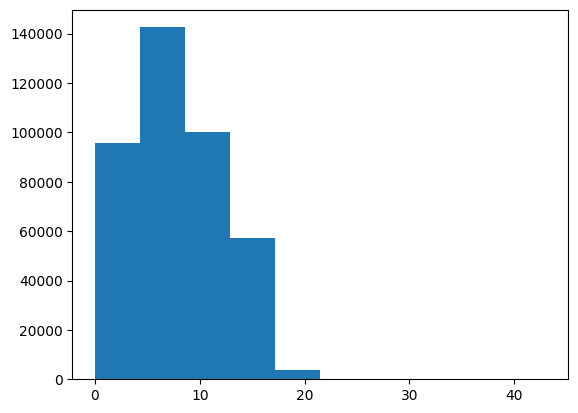

In [56]:
sequence_lengths = [len(seq) for seq in sequences]
print(len(sequence_lengths))
plt.hist(sequence_lengths)
plt.show()

In [57]:
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

As we can see that there total 200000 tweets and the number words/features are 25.

In [58]:
sequences_matrix[0][:5]

array([0, 0, 0, 0, 0])

In [59]:
print(sequences_matrix.shape)

(400000, 25)


#### Separating the 80% data for training data, 10% for validation data, and 10% for testing data

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.
- 80% tweets will be used in the training
- 10% tweets will be used in the validating.
- 10% tweets will be used to test the performance of the model.

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=42,stratify=y)
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size=0.5, random_state=42,stratify=Y_test)

## Implementing Tensorflow based model for training

# Model compilation

- First we are calling the model
- We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy"
- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
- We are setting metrics=accuracy because we are going to calculate the percentage of correct predictions over all predictions on the validation set

# MLP

In [61]:
def mlp_based_model():
    inputs = Input(name='inputs', shape=[max_len])                # Step 1: Input layer, max_len is the length of the input sequence
    layer = Embedding(input_dim=len(tok.word_index)+1, output_dim=200, input_length=max_len)(inputs) # Step 2: Embedding layer (to convert tokens into dense vectors)
    layer = GlobalAveragePooling1D()(layer)                       # Step 3: Global average pooling layer to reduce the embedding to a single vector
    layer = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.1))(layer) # Step 4: First Dense layer with 128 neurons and L2 regularization
    layer = Activation('relu')(layer)                             # Step 5: Activation with ReLU
    layer = Dropout(0.5)(layer)                                   # Step 6: Dropout for regularization
    layer = Dense(64)(layer)                                      # Step 7: Second Dense layer with 64 neurons (additional complexity)
    layer = Activation('relu')(layer)                             # Step 8: Activation with ReLU again
    layer = Dropout(0.5)(layer)                                   # Step 9: Dropout for regularization
    layer = Dense(1, name='out_layer')(layer)                     # Step 10: Output layer with a single neuron for binary classification
    layer = Activation('sigmoid')(layer)                          # Step 11: Sigmoid activation for the final classification (positive or negative)
    model = Model(inputs=inputs, outputs=layer)                   # Step 12: Create and return the final model
    return model


In [62]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model = mlp_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 25)]              0         
                                                                 
 embedding (Embedding)       (None, 25, 200)           51433400  
                                                                 
 global_average_pooling1d (G  (None, 200)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                             

#### Training and validating with parameter tuning
- We are feeding the training data and getting 10% data for validation from training data
* We set the following parameters:
- Batch size = 100 so the model take 100 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
- Epochs = 10 so the model will train on the data 10 times. Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
- We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.


In [63]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True, verbose=1) # here we are using early stopping to stop the training of model if the validation loss is not decreasing  
history=model.fit(X_train,Y_train,batch_size=100,epochs=10, validation_data=(X_val,Y_val),callbacks=[early_stopping]) # compiling the model with loss as binary_crossentropy and optimizer as adam
print('Training finished!')

Epoch 1/10
3200/3200 [==============================] - 117s 36ms/step - loss: 2.6520 - accuracy: 0.6458 - val_loss: 0.5565 - val_accuracy: 0.7513
Epoch 2/10
3200/3200 [==============================] - 110s 34ms/step - loss: 0.5290 - accuracy: 0.7613 - val_loss: 0.5153 - val_accuracy: 0.7648
Epoch 3/10
3200/3200 [==============================] - 106s 33ms/step - loss: 0.4900 - accuracy: 0.7851 - val_loss: 0.5042 - val_accuracy: 0.7665
Epoch 4/10
3200/3200 [==============================] - 113s 35ms/step - loss: 0.4648 - accuracy: 0.8001 - val_loss: 0.4980 - val_accuracy: 0.7714
Epoch 5/10
3200/3200 [==============================] - 114s 36ms/step - loss: 0.4419 - accuracy: 0.8150 - val_loss: 0.5075 - val_accuracy: 0.7666
Epoch 6/10
3200/3200 [==============================] - 113s 35ms/step - loss: 0.4197 - accuracy: 0.8292 - val_loss: 0.5057 - val_accuracy: 0.7709
Epoch 7/10
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3964 - accuracy: 0.8421 - val_loss: 0

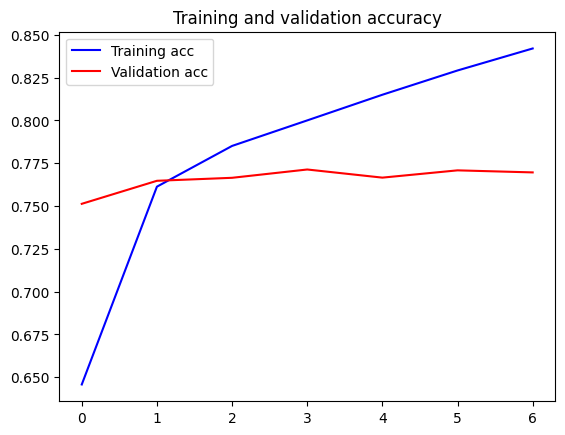

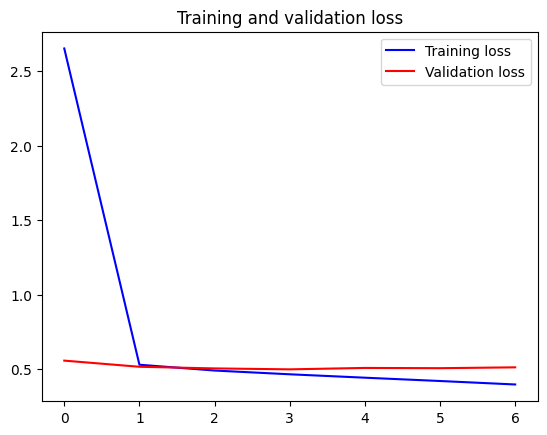

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

#### Testing the Trained model on test data
- Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [65]:
accr1 = model.evaluate(X_test,Y_test) # we are starting to test the model here

1250/1250 [==============================] - 8s 6ms/step - loss: 0.4932 - accuracy: 0.7771


#### Accuracy

In [66]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) # the accuracy of the model on test data is given below

Test set
  Accuracy: 0.78


#### Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
- As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [67]:
y_pred = model.predict(X_test) #getting predictions on the trained model
print(y_pred)
y_pred = (y_pred > 0.5)

1250/1250 [==============================] - 4s 3ms/step
[[0.5866866 ]
 [0.70294535]
 [0.6843201 ]
 ...
 [0.14948241]
 [0.11435294]
 [0.32431364]]


#### Confusion matrix



confusion matrix


[[15492  4508]
 [ 4406 15594]]




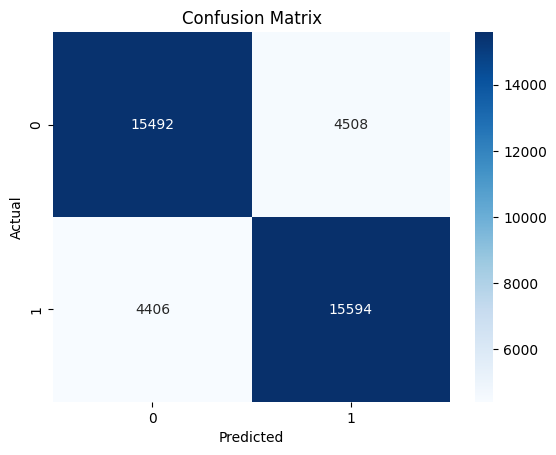

In [68]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

sns.heatmap(CR,annot=True,fmt="g",cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [69]:
cr = classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     20000
           1       0.78      0.78      0.78     20000

    accuracy                           0.78     40000
   macro avg       0.78      0.78      0.78     40000
weighted avg       0.78      0.78      0.78     40000



#### ROC CURVE
- ROC curve show the performance of the model as well.
- We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct
- ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

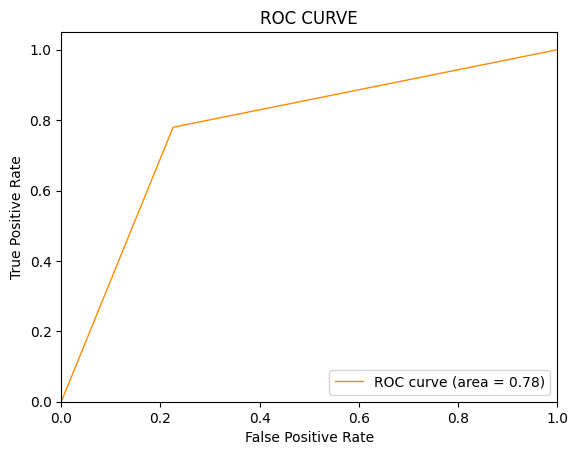

In [70]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# LSTM

In [71]:
def lstm_based_model(): # Defined tensorflow_based_model function for training tenforflow based model
  inputs = Input(name='inputs',shape=[max_len]) # Input layer with input shape as max_len, representing the sequence length of input data
  layer = Embedding(input_dim = len(tok.word_index)+1,output_dim=200,input_length=max_len)(inputs) # Embedding layer that converts input tokens into dense vectors of dimension 200
  layer = LSTM(64)(layer) # LSTM layer with 64 memory units to process sequential data
  # layer = Dense(128, kernel_regularizer = tf.keras.regularizers.l2(0.1))(layer) # First Dense layer with 128 neurons and L2 regularization
  # layer = Activation('relu')(layer) # ReLU activation function
  layer = Dropout(0.5)(layer) # Dropout layer with 50% dropout rate to prevent overfitting
  layer = Dense(1)(layer) # giving only one output as because we need to classify the tweet as positive or negative
  layer = Activation('sigmoid')(layer) # activation function is sigmoid for only one output.
  model = Model(inputs=inputs,outputs=layer) # here we are getting the final output value in the model for classification
  return model # function returning the value when we call it

In [72]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model = lstm_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 25)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 25, 200)           51433400  
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 51,501,305
Trainable params: 51,501,305
Non-t

#### Training and validating

In [73]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True,verbose=1) # here we are using early stopping to stop the training of model if the validation loss is not decreasing  
history=model.fit(X_train,Y_train,batch_size=100,epochs=10, validation_data=(X_val,Y_val),callbacks=[early_stopping]) 
print('Training finished!')

Epoch 1/10
3200/3200 [==============================] - 132s 40ms/step - loss: 0.5252 - accuracy: 0.7420 - val_loss: 0.4754 - val_accuracy: 0.7702
Epoch 2/10
3200/3200 [==============================] - 128s 40ms/step - loss: 0.4316 - accuracy: 0.8026 - val_loss: 0.4725 - val_accuracy: 0.7715
Epoch 3/10
3200/3200 [==============================] - 118s 37ms/step - loss: 0.3697 - accuracy: 0.8390 - val_loss: 0.4974 - val_accuracy: 0.7656
Epoch 4/10
3200/3200 [==============================] - 124s 39ms/step - loss: 0.3054 - accuracy: 0.8723 - val_loss: 0.5452 - val_accuracy: 0.7579
Epoch 5/10
3200/3200 [==============================] - 129s 40ms/step - loss: 0.2630 - accuracy: 0.8908 - val_loss: 0.5708 - val_accuracy: 0.7477
Epoch 5: early stopping
Training finished!


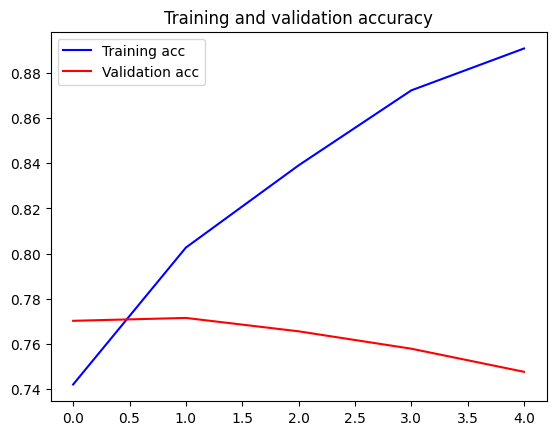

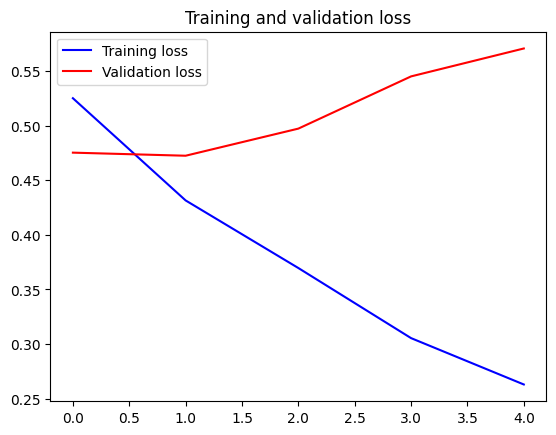

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Accuracy

In [75]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

1250/1250 [==============================] - 11s 8ms/step - loss: 0.4681 - accuracy: 0.7779


In [76]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.78


#### Prediction

In [77]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5)

1250/1250 [==============================] - 7s 5ms/step


#### Confusion Matrix



confusion matrix


[[15568  4432]
 [ 4451 15549]]




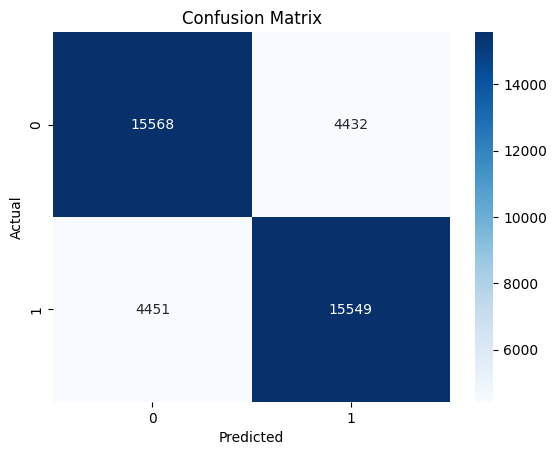

In [78]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

sns.heatmap(CR,annot=True,fmt="g",cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Classification Report

In [79]:
cr = classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     20000
           1       0.78      0.78      0.78     20000

    accuracy                           0.78     40000
   macro avg       0.78      0.78      0.78     40000
weighted avg       0.78      0.78      0.78     40000



#### ROC Curve

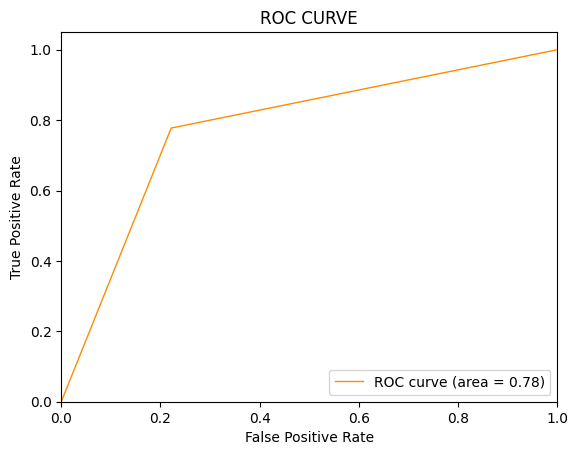

In [80]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Conclusion

MLP:

- Precision for negative (0) = 0.78, Recall for negative (0) = 0.77
- Precision for positive (1) = 0.78, Recall for positive (1) = 0.78

LSTM:

- Precision for negative (0) = 0.78, Recall for negative (0) = 0.78
- Precision for positive (1) = 0.78, Recall for positive (1) = 0.78

Both models show balanced precision and recall for both classes, indicating a strong ability to identify positive and negative sentiments. If the priority is to detect positive sentiments, the MLP model has a slight edge, while the LSTM model is better at detecting negative sentiments.

This is a pretty good model that we are training here in terms of NLP. Also, you can go ahead and explore the dataset, some tweets may have languages other than English.  This model is good to handle most of the tasks for Sentiment Analysis.